In [1]:
%pylab inline
import pandas as pd
from scipy import integrate
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('./data/skyscrapper.csv')
data = data.dropna()

ts = data.relative_time/1000 # Use seconds instead of ms
az = data.AccZ

ts = ts.as_matrix()
az = az.as_matrix()

In [3]:
indices = [0, 180, 1185, ts.size]
ts_init = ts[indices[0]:indices[1]]
az_init = az[indices[0]:indices[1]]

ts_experiment = ts[indices[1]:indices[2]]
az_experiment = az[indices[1]:indices[2]]

ts_out = ts[indices[2]:indices[3]]
az_out = az[indices[2]:indices[3]]

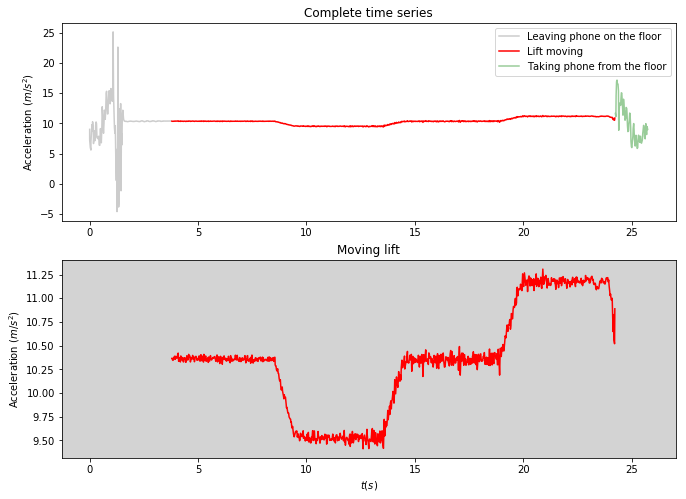

In [10]:
plt.rcParams['figure.figsize'] = (11, 8)
plt.rcParams['font.size'] = 10.0

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)

plt.title('Complete time series')
plt.plot(ts_init, az_init, color='gray', alpha=0.4)
plt.plot(ts_experiment, az_experiment, color='red')
plt.plot(ts_out, az_out, color='green', alpha=0.4)

plt.ylabel('Acceleration $(m / s^2)$')
plt.legend(['Leaving phone on the floor', 'Lift moving', 'Taking phone from the floor']);

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.patch.set_facecolor('lightgray')
plt.title('Moving lift')
plt.plot(ts_experiment, az_experiment, color='red')

plt.xlabel('$t (s)$')
plt.ylabel('Acceleration $(m / s^2)$');

In [11]:
g = az_experiment.mean()
az_experiment_detrended = az_experiment - g 

In [12]:
v = np.zeros(ts_experiment.size-1)
for i in range(1, ts_experiment.size):
    y_temp = az_experiment_detrended[:i]
    t_temp = ts_experiment[:i]
    v[i-1] = integrate.simps(y_temp, t_temp, even='avg')
    
x = np.zeros(ts_experiment.size-2)
for i in range(1, ts_experiment.size-1):
    y_temp = v[:i]
    t_temp = ts_experiment[:i]
    x[i-1] = integrate.simps(y_temp, t_temp, even='avg')

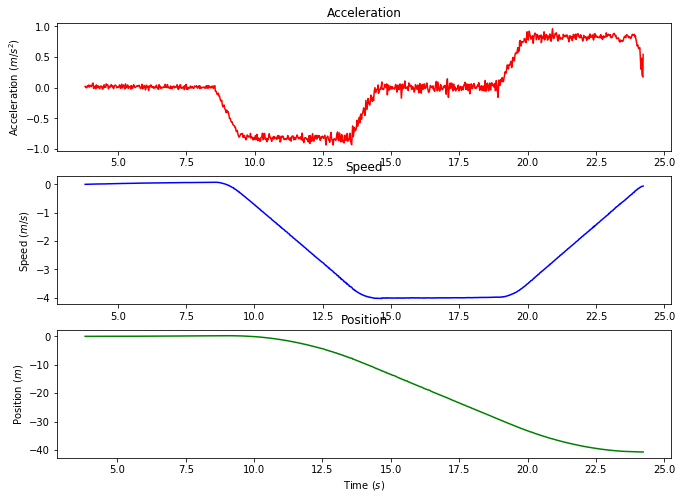

In [14]:
plt.subplot(311)
plt.title('Acceleration')
plt.plot(ts_experiment, az_experiment_detrended, color='red')
plt.ylabel('Acceleration $(m / s^2)$')

plt.subplot(312)
plt.title('Speed')
plot(ts_experiment[1:], v, color='blue')
plt.ylabel('Speed $(m / s)$')

plt.subplot(313)
plt.title('Position')
plot(ts_experiment[2:], x, color='green')
plt.ylabel('Position $(m)$')

plt.xlabel('Time $(s)$');

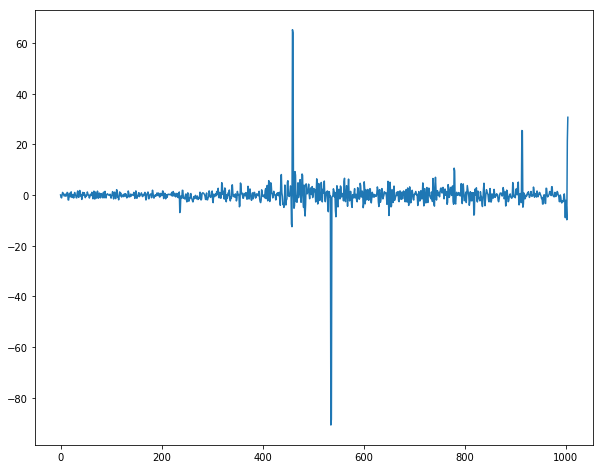